<a href="https://colab.research.google.com/github/Vivekchavda1374/ML/blob/main/Multiple_Variable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.	Load the basic libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/master/ex1data2.txt" , names = ['Area' , "Rooms" , "Prices"])
dataset.head()

,Area,Rooms,Prices
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
# 3.	Analyse the dataset

dataset.describe()

,Area,Rooms,Prices
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
def Feature_Normalization(X):
  X = (X - np.mean(X , axis = 0)) / np.std(X , axis = 0)
  return X , np.mean(X , axis = 0) ,  np.std(X , axis = 0)

In [ ]:
dataset_norm = dataset.values
m = len(dataset_norm[:,0])

In [ ]:
X_in = dataset_norm[:,0:2].reshape(m,2)
X2 , mean_x2 , std_x2 = Feature_Normalization(X_in)

In [ ]:
Y2 = dataset_norm[:,-1].reshape(m,1)

In [ ]:
theta_Array = np.zeros((3,1))
theta_Array

array([[0.],
       [0.],
       [0.]])

In [ ]:
def Hypothesis(theta_array , x1 , x2) :
  return theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2

In [ ]:
def  Cost_Function(theta_array,x1,x2,y , m):
  total_cost = 0
  for i in range(m):
    total_cost += (Hypothesis(theta_array,x1[i] , x2[i]) - y[i])**2
  return total_cost/(2*m)

In [ ]:
def Gradient_Descent(theta_array , x1, x2, y , m ,alpha) :
  summation_0 = 0
  summation_1 = 0
  summation_2 = 0

  for i in range(m):
    summation_0 += (Hypothesis(theta_array,x1[i] , x2[i]) - y[i])
    summation_1 += ((Hypothesis(theta_array,x1[i] , x2[i]) - y[i])*x1[i])
    summation_2 += ((Hypothesis(theta_array,x1[i] , x2[i]) - y[i])*x2[i])
  new_theta0 = theta_array[0] - (alpha/m)*summation_0
  new_theta1 = theta_array[1] - (alpha/m)*summation_1
  new_theta2 = theta_array[2] - (alpha/m)*summation_2

  new_theta = [new_theta0 , new_theta1 , new_theta2]

  return new_theta

In [ ]:
def Training(x1, x2, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_array = [theta_0, theta_1  ,theta_2]
    m = len(x1)
    cost_values = []

    for i in range(epochs):
        theta_array = Gradient_Descent(theta_array, x1  ,x2, y, m, alpha)
        loss = Cost_Function(theta_array, x1  ,x2, y, m)
        cost_values.append(loss)
        y_new = theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2



    x = np.arange(0, epochs)
    plt.plot(x, cost_values)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

    return theta_array

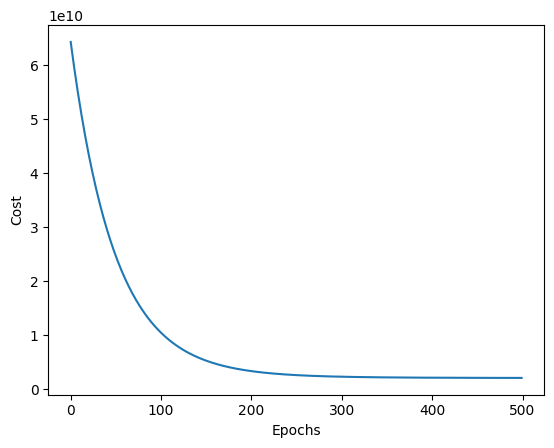

In [ ]:
alpha = 0.01
epochs = 500
area = dataset.iloc[:,0].values
room = dataset.iloc[:,1].values
price = dataset.iloc[:,2].values
theta_array = Training(X2[:,0:1]  , X2[: , 1:2] ,Y2 , alpha , epochs)

In [ ]:
print(theta_array)

[array([338175.98396731]), array([103032.12432974]), array([-202.3252331])]


In [ ]:
Hypothesis(theta_array , 4 , 2100)

array([325421.49176854])